In [1]:
!pip install tensorflow==1.15.0 tensorflow-gpu==1.15.0 opencv-python mediapipe sklearn matplotlib

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached tensorflow_estimator-1.15.1-py2.py3-none-any.whl (503 kB)
  Using cached tensorboard-1.15.0-py3-none-any.whl (3.8 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=3020b2abba9e7f07f7c9a311055e22c126b6cf60849c71b6fb11c7e368ada2dd
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

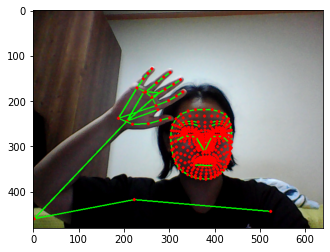

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
len(results.right_hand_landmarks.landmark) # 오른손 확인해보기

21

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
result_test = extract_keypoints(results)

In [14]:
result_test

array([ 0.59180605,  0.64895862, -0.95367396, ...,  0.41042849,
        0.26993433, -0.04419634])

In [15]:
np.save('0', result_test)

In [16]:
np.load('0.npy')

array([ 0.59180605,  0.64895862, -0.95367396, ...,  0.41042849,
        0.26993433, -0.04419634])

In [17]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['HI', 'SOS', 'Wakanda'])
no_sequences = 30
sequence_length = 30

start_folder = 30

In [18]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [19]:
#동작 파일에 저장

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):                        #30번
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):                #30번

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [39]:
!pip install np_utils

ERROR! Session/line number was not unique in database. History logging moved to new session 8
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57125 sha256=080facc4672f90d93f7770fb12b4fb13bed88b53b5655b5ebf2b66eaf72f5cd0
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\58\98\54\2896a40fd91932a8a2568e688f87231f7da2eaad330254335a
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=132bb4c74efc100953c6a18f784f9e7dfa87357903fb52ca5e403632e80c2a79
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6e\9c\ed\4499c9865ac1002697793e0ae05ba6be33553d098f3347fb94
Successfully built np-utils future


In [40]:
!pip uninstall keras && pip install keras==2.4.3

ERROR! Session/line number was not unique in database. History logging moved to new session 9


In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'HI': 0, 'SOS': 1, 'Wakanda': 2}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(90, 30, 1662)

In [25]:
np.array(labels).shape

(90,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(90, 30, 1662)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [30]:
y_test.shape

(5, 3)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [44]:
#***************
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [34]:
res = [.7, 0.2, 0.1]

In [35]:
actions[np.argmax(res)]

'HI'

In [45]:
#******************
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [38]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Train on 85 samples
Epoch 1/1000
85/85 [==============================] - 3s 31ms/sample - loss: 11.2384 - categorical_accuracy: 0.3176
Epoch 2/1000
85/85 [==============================] - 3s 36ms/sample - loss: 7.2093 - categorical_accuracy: 0.3882
Epoch 3/1000
85/85 [==============================] - 3s 39ms/sample - loss: 9.5294 - categorical_accuracy: 0.3765
Epoch 4/1000
85/85 [==============================] - 3s 32ms/sample - loss: 28.5179 - categorical_accuracy: 0.4118
Epoch 5/1000
85/85 [==============================] - 3s 32ms/sample - loss: 10.2647 - categorical_accuracy: 0.2941
Epoch 6/1000
85/85 [==============================] - 3s 35ms/sample - loss: 14.9685 - categorical_accuracy: 0.3294
Epoch 7/1000
85/85 [==============================] - 3s 38ms/sample - loss: 11.2481 - categorical_accuracy: 0.3176
Epoch 8/1000
85/85 [==============================] - 3s 32ms/sample - loss: 19.9761 - categorical_accuracy: 0.3412
Epoch 9/1000
85/85 [==============================] - 

85/85 [==============================] - 4s 42ms/sample - loss: 29.0826 - categorical_accuracy: 0.3176
Epoch 72/1000
85/85 [==============================] - 4s 49ms/sample - loss: 37.1824 - categorical_accuracy: 0.3412
Epoch 73/1000
85/85 [==============================] - 3s 36ms/sample - loss: 20.7447 - categorical_accuracy: 0.2235
Epoch 74/1000
85/85 [==============================] - 3s 33ms/sample - loss: 4.7045 - categorical_accuracy: 0.4471
Epoch 75/1000
85/85 [==============================] - 3s 38ms/sample - loss: 11.4342 - categorical_accuracy: 0.2824
Epoch 76/1000
85/85 [==============================] - 3s 39ms/sample - loss: 9.5477 - categorical_accuracy: 0.3765
Epoch 77/1000
85/85 [==============================] - 4s 43ms/sample - loss: 11.2928 - categorical_accuracy: 0.3294
Epoch 78/1000
85/85 [==============================] - 4s 51ms/sample - loss: 20.4631 - categorical_accuracy: 0.3294
Epoch 79/1000
85/85 [==============================] - 4s 43ms/sample - loss: 11

Epoch 141/1000
85/85 [==============================] - 4s 41ms/sample - loss: 23.3026 - categorical_accuracy: 0.3412
Epoch 142/1000
85/85 [==============================] - 4s 42ms/sample - loss: 12.1781 - categorical_accuracy: 0.4118
Epoch 143/1000
85/85 [==============================] - 3s 31ms/sample - loss: 23.2023 - categorical_accuracy: 0.2824
Epoch 144/1000
85/85 [==============================] - 4s 45ms/sample - loss: 19.6066 - categorical_accuracy: 0.3412
Epoch 145/1000
85/85 [==============================] - 3s 39ms/sample - loss: 9.2533 - categorical_accuracy: 0.3529
Epoch 146/1000
85/85 [==============================] - 4s 51ms/sample - loss: 25.2644 - categorical_accuracy: 0.2941
Epoch 147/1000
85/85 [==============================] - 3s 34ms/sample - loss: 19.4680 - categorical_accuracy: 0.3412
Epoch 148/1000
85/85 [==============================] - 5s 59ms/sample - loss: 9.1680 - categorical_accuracy: 0.2588
Epoch 149/1000
85/85 [==============================] - 5s

85/85 [==============================] - 3s 35ms/sample - loss: 17.1773 - categorical_accuracy: 0.3529
Epoch 211/1000
85/85 [==============================] - 3s 36ms/sample - loss: 14.1415 - categorical_accuracy: 0.3294
Epoch 212/1000
85/85 [==============================] - 3s 37ms/sample - loss: 9.0879 - categorical_accuracy: 0.3412
Epoch 213/1000
85/85 [==============================] - 3s 38ms/sample - loss: 5.6506 - categorical_accuracy: 0.2118
Epoch 214/1000
85/85 [==============================] - 3s 33ms/sample - loss: 7.1142 - categorical_accuracy: 0.3176
Epoch 215/1000
85/85 [==============================] - 3s 35ms/sample - loss: 6.6644 - categorical_accuracy: 0.3529
Epoch 216/1000
85/85 [==============================] - 3s 37ms/sample - loss: 3.3997 - categorical_accuracy: 0.5294
Epoch 217/1000
85/85 [==============================] - 3s 40ms/sample - loss: 6.4350 - categorical_accuracy: 0.3059
Epoch 218/1000
85/85 [==============================] - 3s 35ms/sample - loss

85/85 [==============================] - 3s 33ms/sample - loss: 11.6937 - categorical_accuracy: 0.3529
Epoch 280/1000
85/85 [==============================] - 3s 32ms/sample - loss: 13.3914 - categorical_accuracy: 0.4235
Epoch 281/1000
85/85 [==============================] - 3s 39ms/sample - loss: 10.1919 - categorical_accuracy: 0.3412
Epoch 282/1000
85/85 [==============================] - 3s 37ms/sample - loss: 16.2137 - categorical_accuracy: 0.3412
Epoch 283/1000
85/85 [==============================] - 3s 34ms/sample - loss: 30.0582 - categorical_accuracy: 0.3059
Epoch 284/1000
85/85 [==============================] - 3s 38ms/sample - loss: 16.2013 - categorical_accuracy: 0.2824
Epoch 285/1000
85/85 [==============================] - 3s 38ms/sample - loss: 33.4190 - categorical_accuracy: 0.3294
Epoch 286/1000
85/85 [==============================] - 3s 37ms/sample - loss: 13.4557 - categorical_accuracy: 0.3412
Epoch 287/1000
85/85 [==============================] - 3s 31ms/sample 

85/85 [==============================] - 5s 65ms/sample - loss: 6.2523 - categorical_accuracy: 0.3412
Epoch 349/1000
85/85 [==============================] - 6s 66ms/sample - loss: 9.2601 - categorical_accuracy: 0.3882
Epoch 350/1000
85/85 [==============================] - 6s 66ms/sample - loss: 17.5790 - categorical_accuracy: 0.3294
Epoch 351/1000
85/85 [==============================] - 4s 42ms/sample - loss: 17.6664 - categorical_accuracy: 0.3059
Epoch 352/1000
85/85 [==============================] - 3s 39ms/sample - loss: 26.8799 - categorical_accuracy: 0.2706
Epoch 353/1000
85/85 [==============================] - 4s 45ms/sample - loss: 40.3567 - categorical_accuracy: 0.3412
Epoch 354/1000
85/85 [==============================] - 3s 40ms/sample - loss: 13.5893 - categorical_accuracy: 0.3412
Epoch 355/1000
85/85 [==============================] - 3s 39ms/sample - loss: 30.9507 - categorical_accuracy: 0.3294
Epoch 356/1000
85/85 [==============================] - 4s 42ms/sample - 

85/85 [==============================] - 4s 42ms/sample - loss: 8.0768 - categorical_accuracy: 0.3176
Epoch 418/1000
85/85 [==============================] - 3s 41ms/sample - loss: 4.1266 - categorical_accuracy: 0.3647
Epoch 419/1000
85/85 [==============================] - 4s 42ms/sample - loss: 2.1818 - categorical_accuracy: 0.3059
Epoch 420/1000
85/85 [==============================] - 4s 44ms/sample - loss: 6.5917 - categorical_accuracy: 0.4353
Epoch 421/1000
85/85 [==============================] - 3s 39ms/sample - loss: 8.1161 - categorical_accuracy: 0.2824
Epoch 422/1000
85/85 [==============================] - 4s 43ms/sample - loss: 12.7904 - categorical_accuracy: 0.4235
Epoch 423/1000
85/85 [==============================] - 4s 46ms/sample - loss: 5.6903 - categorical_accuracy: 0.2824
Epoch 424/1000
85/85 [==============================] - 3s 40ms/sample - loss: 4.2464 - categorical_accuracy: 0.4118
Epoch 425/1000
85/85 [==============================] - 4s 42ms/sample - loss:

Epoch 487/1000
85/85 [==============================] - 4s 43ms/sample - loss: 13.0112 - categorical_accuracy: 0.3059
Epoch 488/1000
85/85 [==============================] - 3s 39ms/sample - loss: 22.6499 - categorical_accuracy: 0.3412
Epoch 489/1000
85/85 [==============================] - 3s 41ms/sample - loss: 14.6597 - categorical_accuracy: 0.2118
Epoch 490/1000
85/85 [==============================] - 4s 42ms/sample - loss: 5.6845 - categorical_accuracy: 0.3294
Epoch 491/1000
85/85 [==============================] - 4s 41ms/sample - loss: 5.9557 - categorical_accuracy: 0.3765
Epoch 492/1000
85/85 [==============================] - 3s 38ms/sample - loss: 18.6968 - categorical_accuracy: 0.3412
Epoch 493/1000
85/85 [==============================] - 4s 42ms/sample - loss: 9.8433 - categorical_accuracy: 0.3765
Epoch 494/1000
85/85 [==============================] - 4s 42ms/sample - loss: 8.7319 - categorical_accuracy: 0.3294
Epoch 495/1000
85/85 [==============================] - 3s 3

85/85 [==============================] - 3s 40ms/sample - loss: 15.8785 - categorical_accuracy: 0.2941
Epoch 557/1000
85/85 [==============================] - 3s 37ms/sample - loss: 9.4242 - categorical_accuracy: 0.3176
Epoch 558/1000
85/85 [==============================] - 4s 44ms/sample - loss: 13.2510 - categorical_accuracy: 0.3059
Epoch 559/1000
85/85 [==============================] - 3s 39ms/sample - loss: 20.9789 - categorical_accuracy: 0.3176
Epoch 560/1000
85/85 [==============================] - 3s 38ms/sample - loss: 14.7131 - categorical_accuracy: 0.2706
Epoch 561/1000
85/85 [==============================] - 3s 41ms/sample - loss: 15.5524 - categorical_accuracy: 0.3529
Epoch 562/1000
85/85 [==============================] - 4s 42ms/sample - loss: 20.6218 - categorical_accuracy: 0.2706
Epoch 563/1000
85/85 [==============================] - 3s 38ms/sample - loss: 10.3360 - categorical_accuracy: 0.4000
Epoch 564/1000
85/85 [==============================] - 3s 41ms/sample -

85/85 [==============================] - 4s 43ms/sample - loss: 9.3323 - categorical_accuracy: 0.3059
Epoch 626/1000
85/85 [==============================] - 3s 40ms/sample - loss: 15.2501 - categorical_accuracy: 0.3294
Epoch 627/1000
85/85 [==============================] - 4s 44ms/sample - loss: 18.3387 - categorical_accuracy: 0.3294
Epoch 628/1000
85/85 [==============================] - 4s 42ms/sample - loss: 18.9582 - categorical_accuracy: 0.4118
Epoch 629/1000
85/85 [==============================] - 4s 42ms/sample - loss: 12.4492 - categorical_accuracy: 0.3529
Epoch 630/1000
85/85 [==============================] - 4s 41ms/sample - loss: 14.0749 - categorical_accuracy: 0.3176
Epoch 631/1000
85/85 [==============================] - 4s 43ms/sample - loss: 24.7596 - categorical_accuracy: 0.3412
Epoch 632/1000
85/85 [==============================] - 3s 39ms/sample - loss: 10.9136 - categorical_accuracy: 0.3059
Epoch 633/1000
85/85 [==============================] - 3s 40ms/sample -

85/85 [==============================] - 4s 47ms/sample - loss: 4.5664 - categorical_accuracy: 0.4000
Epoch 695/1000
85/85 [==============================] - 6s 66ms/sample - loss: 3.7601 - categorical_accuracy: 0.3529
Epoch 696/1000
85/85 [==============================] - 6s 67ms/sample - loss: 2.5811 - categorical_accuracy: 0.3765
Epoch 697/1000
85/85 [==============================] - 5s 54ms/sample - loss: 4.1243 - categorical_accuracy: 0.3294
Epoch 698/1000
85/85 [==============================] - 4s 48ms/sample - loss: 2.5970 - categorical_accuracy: 0.3059
Epoch 699/1000
85/85 [==============================] - 3s 38ms/sample - loss: 4.1028 - categorical_accuracy: 0.3294
Epoch 700/1000
85/85 [==============================] - 4s 47ms/sample - loss: 1.4065 - categorical_accuracy: 0.5765
Epoch 701/1000
85/85 [==============================] - 4s 44ms/sample - loss: 9.4922 - categorical_accuracy: 0.4588
Epoch 702/1000
85/85 [==============================] - 4s 50ms/sample - loss: 

85/85 [==============================] - 4s 43ms/sample - loss: 3.4915 - categorical_accuracy: 0.4706
Epoch 765/1000
85/85 [==============================] - 3s 41ms/sample - loss: 8.3190 - categorical_accuracy: 0.4353
Epoch 766/1000
85/85 [==============================] - 3s 38ms/sample - loss: 7.0081 - categorical_accuracy: 0.2471
Epoch 767/1000
85/85 [==============================] - 4s 42ms/sample - loss: 8.9122 - categorical_accuracy: 0.3412
Epoch 768/1000
85/85 [==============================] - 4s 42ms/sample - loss: 7.6005 - categorical_accuracy: 0.4588
Epoch 769/1000
85/85 [==============================] - 3s 38ms/sample - loss: 9.1185 - categorical_accuracy: 0.3412
Epoch 770/1000
85/85 [==============================] - 4s 43ms/sample - loss: 13.9386 - categorical_accuracy: 0.4000
Epoch 771/1000
85/85 [==============================] - 3s 39ms/sample - loss: 4.4877 - categorical_accuracy: 0.3882
Epoch 772/1000
85/85 [==============================] - 3s 39ms/sample - loss:

85/85 [==============================] - 3s 38ms/sample - loss: 4.0158 - categorical_accuracy: 0.2588
Epoch 835/1000
85/85 [==============================] - 3s 40ms/sample - loss: 4.4872 - categorical_accuracy: 0.3294
Epoch 836/1000
85/85 [==============================] - 4s 44ms/sample - loss: 7.6642 - categorical_accuracy: 0.3059
Epoch 837/1000
85/85 [==============================] - 3s 39ms/sample - loss: 9.7319 - categorical_accuracy: 0.3412
Epoch 838/1000
85/85 [==============================] - 3s 39ms/sample - loss: 3.9386 - categorical_accuracy: 0.3765
Epoch 839/1000
85/85 [==============================] - 4s 44ms/sample - loss: 8.2063 - categorical_accuracy: 0.3412
Epoch 840/1000
85/85 [==============================] - 3s 39ms/sample - loss: 4.2940 - categorical_accuracy: 0.3882
Epoch 841/1000
85/85 [==============================] - 3s 37ms/sample - loss: 8.2725 - categorical_accuracy: 0.3412
Epoch 842/1000
85/85 [==============================] - 3s 33ms/sample - loss: 

85/85 [==============================] - 4s 42ms/sample - loss: 2.2852 - categorical_accuracy: 0.2706
Epoch 905/1000
85/85 [==============================] - 4s 42ms/sample - loss: 2.4964 - categorical_accuracy: 0.4000
Epoch 906/1000
85/85 [==============================] - 3s 40ms/sample - loss: 2.8738 - categorical_accuracy: 0.3059
Epoch 907/1000
85/85 [==============================] - 3s 40ms/sample - loss: 2.4959 - categorical_accuracy: 0.3412
Epoch 908/1000
85/85 [==============================] - 4s 43ms/sample - loss: 1.6864 - categorical_accuracy: 0.4118
Epoch 909/1000
85/85 [==============================] - 4s 41ms/sample - loss: 2.1142 - categorical_accuracy: 0.3176
Epoch 910/1000
85/85 [==============================] - 4s 42ms/sample - loss: 1.6858 - categorical_accuracy: 0.4941
Epoch 911/1000
85/85 [==============================] - 4s 43ms/sample - loss: 1.6044 - categorical_accuracy: 0.4000
Epoch 912/1000
85/85 [==============================] - 3s 40ms/sample - loss: 

85/85 [==============================] - 4s 42ms/sample - loss: 4.9238 - categorical_accuracy: 0.3529
Epoch 975/1000
85/85 [==============================] - 4s 42ms/sample - loss: 6.6679 - categorical_accuracy: 0.3529
Epoch 976/1000
85/85 [==============================] - 3s 38ms/sample - loss: 12.0785 - categorical_accuracy: 0.2824
Epoch 977/1000
85/85 [==============================] - 3s 41ms/sample - loss: 4.0593 - categorical_accuracy: 0.5176
Epoch 978/1000
85/85 [==============================] - 4s 42ms/sample - loss: 3.1827 - categorical_accuracy: 0.3412
Epoch 979/1000
85/85 [==============================] - 3s 40ms/sample - loss: 4.1641 - categorical_accuracy: 0.3294
Epoch 980/1000
85/85 [==============================] - 3s 39ms/sample - loss: 4.9958 - categorical_accuracy: 0.2941
Epoch 981/1000
85/85 [==============================] - 4s 44ms/sample - loss: 2.2989 - categorical_accuracy: 0.4353
Epoch 982/1000
85/85 [==============================] - 3s 38ms/sample - loss:

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

In [39]:
res = model.predict(X_test)

In [40]:
actions[np.argmax(res[0])]

'SOS'

In [41]:
actions[np.argmax(y_test[0])]

'SOS'

In [42]:
model.save('action.h5')

In [43]:
del model
# 이 코드 실행후 *****표시 코드 2개 실행

In [46]:
model.load_weights('action.h5')

In [47]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [48]:
yhat = model.predict(X_test)

In [49]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [50]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [2, 0]],

       [[0, 4],
        [0, 1]],

       [[3, 0],
        [2, 0]]], dtype=int64)

In [51]:
accuracy_score(ytrue, yhat)

0.2

In [52]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [63]:
cap.release()
cv2.destroyAllWindows()